# Forecasting Onset of Diabetes Mellitus

This project focuses on predicting the whether or not a patient has diabetes. The data is cleaned, analyzed, and used to develop a predictive model.

## Columns 

Pregnancies: Number of times pregnant <br><br>
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br><br>
BloodPressure: Diastolic blood pressure (mm Hg) <br> <br>
SkinThickness: Triceps skin fold thickness (mm) <br><br>
Insulin: 2-Hour serum insulin (mu U/ml) <br><br>
BMI: Body mass index (weight in kg/(height in m)^2)<br><br>
Diabetes Pedigree Function: Diabetes pedigree function<br><br>
Age: Age (years)<br><br>
Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import itertools 
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Cleaning <brk>
    
Explore the data to look for any inconsistencies, such as null values, correct data types, etc. 

In [3]:
df = df.rename(columns = {'BloodPressure':'BP', 'DiabetesPedigreeFunction':"DPF"}) #Rename column titles to make them shorter

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null int64
BP               768 non-null int64
SkinThickness    768 non-null int64
Insulin          768 non-null int64
BMI              768 non-null float64
DPF              768 non-null float64
Age              768 non-null int64
Outcome          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Notes** <brk>
    
    1. Do the minimum values of 0 make sense for all the different features ??  
    2. There are no null value data points in the original data 
    3. All the data is in the correct data type format (int or float). 
    
    The zero values in certain columns (Glucose, BP, Skin Thickness, Insuline, BMI) will be replaced with 'NaN' until further
    analysis is conducted on the data. 

In [6]:
zeroCols = ['Glucose', 'BP', 'SkinThickness', 'Insulin','BMI'] # Columns with incorrect Zero values 
df2 = df.copy() # create a copy of the original dataframe 
df2[zeroCols] = df2[zeroCols].replace(0,np.NaN)
df2.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
outcomes = df2["Outcome"].value_counts()
print(outcomes)

0    500
1    268
Name: Outcome, dtype: int64


**Note:** There is an big imbalance between the number of records for both outcomes. This must be taken into consideration when training the model to predict the onset of diabetes. 

**Descriptive Stats Comparison** <br>
Comparison of descriptive stats between the original data and the new data with 0s replaced with NaNs

In [8]:
df.describe() # Original data loaded into a dataframe 

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df2.describe() # Data with 0s replaced with NaNs

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Note:** After replacing the 0s, 'SkinThickness' and 'Insulin' data has been significantly reduced. 

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          763 non-null float64
BP               733 non-null float64
SkinThickness    541 non-null float64
Insulin          394 non-null float64
BMI              757 non-null float64
DPF              768 non-null float64
Age              768 non-null int64
Outcome          768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
null_values = (df2.isna().sum()/len(df2))*100
null_values.drop(labels = ['Pregnancies','DPF','Age','Outcome'], inplace=True)
print("Column Name" + "     " + "% of Null Values\n")
print(null_values)

Column Name     % of Null Values

Glucose           0.651042
BP                4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64


It is possible that the **presence/lack** of Skin Thickness and Insulin data is related to a person having diabetes. To check, the ratio between the number of data points for each outcome was noted. If the ratio for all the features is within the same range, then it could be assumed that there might not be a relationship as mentioned previously. However, if ratio is significantly skewed one way (ex: records of diabetes patients have significantly more data points of insulin collected), it could be an indicator of a relationship between the missing values and a patient having diabetes. 

In [12]:
dp = df2.groupby('Outcome').count() # Grouping the number of data points for both outcomes 
#print(dp)
outcome_0 = dp.loc[0,:] # Number of data points related to Outcome = 0
outcome_1 = dp.loc[1,:] # Number of data points related to Outcome = 1
print("Column Name" + "     " + "Outcome 1 to Outcome 2 Data Points Ratio\n") 
print(outcome_1/outcome_0)

Column Name     Outcome 1 to Outcome 2 Data Points Ratio

Pregnancies      0.536000
Glucose          0.535211
BP               0.523909
SkinThickness    0.498615
Insulin          0.492424
BMI              0.541752
DPF              0.536000
Age              0.536000
dtype: float64


According to the ratios displayed above, the ratio for the number of data points is around 0.5 (plus-min 0.04). It would be safe to conclude that the ratio between the number of data points for Skin Thickness and Insulin for both outcomes are within the same range as other features. 

## EDA
Explore the data to get a better understanding of different trends, correlations, patterns, etc. 

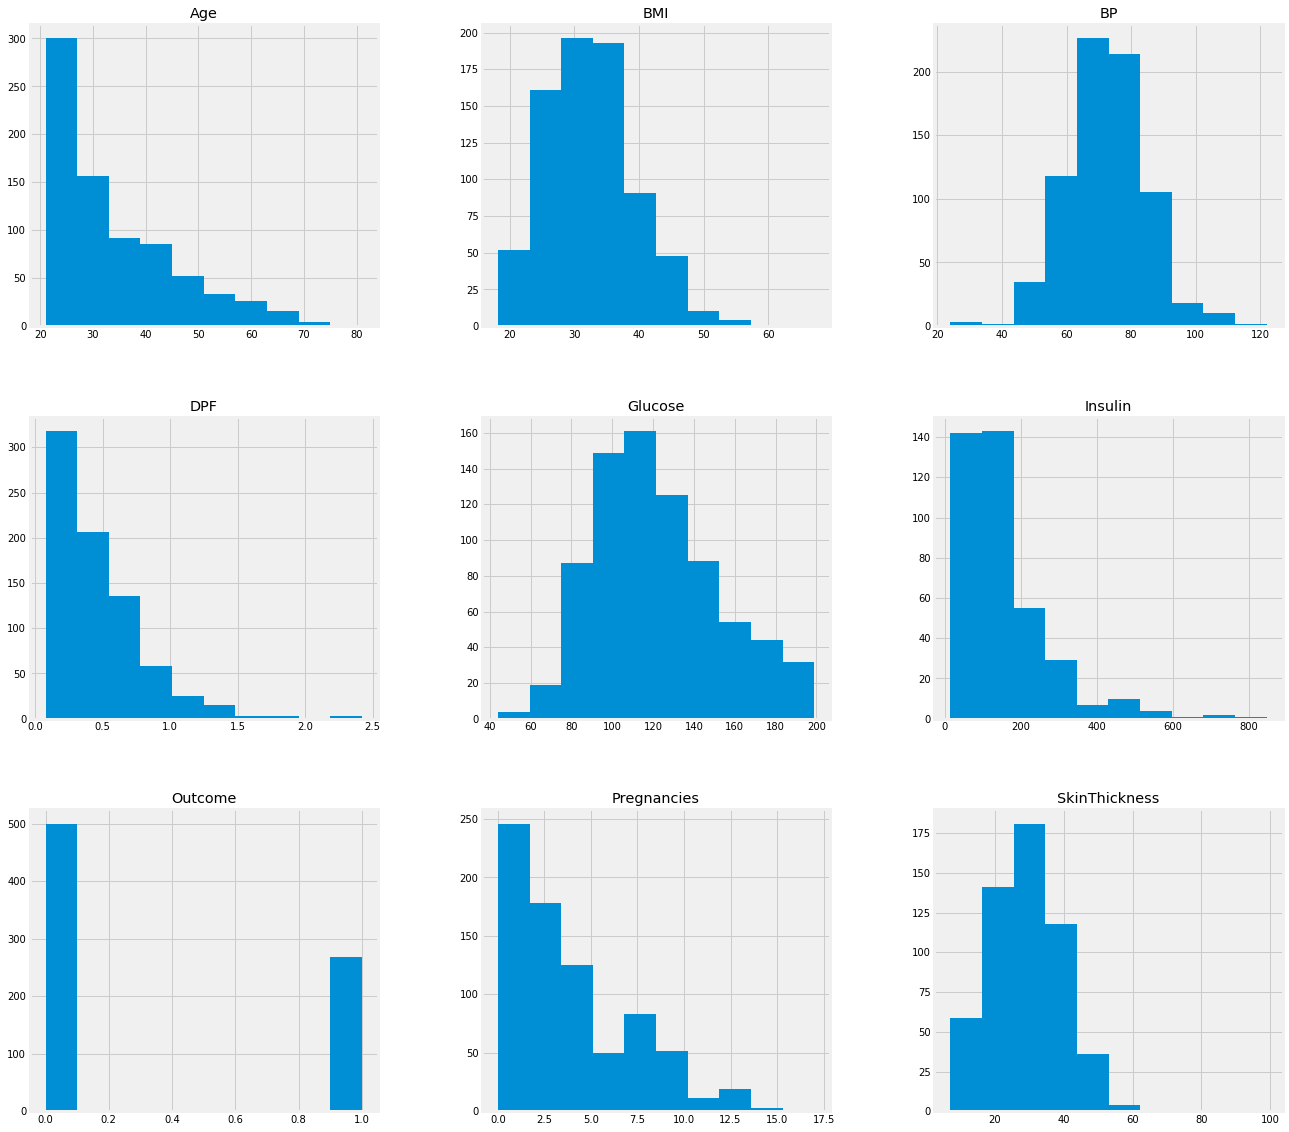

In [13]:
hist = df2.hist(figsize = (20,20))
# Disregard the outcome histogram 